In [177]:
import pandas as pd
import numpy as np
inputData = pd.read_csv('California Housing Data.csv', delimiter=',')

In [178]:
inputData.head()

,Unnamed: 0,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude,medianHouseValue
0,0,41.0,6.984127,1.023810,322.0,2.555556,8.3252,37.88,-122.23,4.526
1,1,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,37.86,-122.22,3.585
2,2,52.0,8.288136,1.073446,496.0,2.802260,7.2574,37.85,-122.24,3.521
3,3,52.0,5.817352,1.073059,558.0,2.547945,5.6431,37.85,-122.25,3.413
4,4,52.0,6.281853,1.081081,565.0,2.181467,3.8462,37.85,-122.25,3.422


In [179]:
inputData.corr()['medianHouseValue']

Unnamed: 0          0.072086
HouseAge            0.105623
AveRooms            0.151948
AveBedrms          -0.046701
Population         -0.024650
AveOccup           -0.023737
MedInc              0.688075
Latitude           -0.144160
Longitude          -0.045967
medianHouseValue    1.000000
Name: medianHouseValue, dtype: float64

In [180]:
inputData = inputData.dropna(axis=0)
y_data = inputData['medianHouseValue']
inputData.drop(labels=[inputData.columns[0], 'medianHouseValue'], inplace=True, axis=1)
inputData.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,8.3252,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,7.2574,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,5.6431,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,3.8462,37.85,-122.25


In [181]:
y_data

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
5        2.697
6        2.992
7        2.414
8        2.267
9        2.611
10       2.815
11       2.418
12       2.135
13       1.913
14       1.592
15       1.400
16       1.525
17       1.555
18       1.587
19       1.629
20       1.475
21       1.598
22       1.139
23       0.997
24       1.326
25       1.075
26       0.938
27       1.055
28       1.089
29       1.320
         ...  
20610    0.455
20611    0.470
20612    0.483
20613    0.534
20614    0.580
20615    0.575
20616    0.551
20617    0.708
20618    0.634
20619    0.991
20620    1.000
20621    0.775
20622    0.670
20623    0.655
20624    0.872
20625    0.720
20626    0.938
20627    1.625
20628    0.924
20629    1.083
20630    1.120
20631    1.072
20632    1.156
20633    0.983
20634    1.168
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: medianHouseValue, Length: 20640, dtype: float64

In [182]:
inputData.describe()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,5.429000,1.096675,1425.476744,3.070655,3.870671,35.631861,-119.569704
std,12.585558,2.474173,0.473911,1132.462122,10.386050,1.899822,2.135952,2.003532
min,1.000000,0.846154,0.333333,3.000000,0.692308,0.499900,32.540000,-124.350000
25%,18.000000,4.440716,1.006079,787.000000,2.429741,2.563400,33.930000,-121.800000
50%,29.000000,5.229129,1.048780,1166.000000,2.818116,3.534800,34.260000,-118.490000
75%,37.000000,6.052381,1.099526,1725.000000,3.282261,4.743250,37.710000,-118.010000
max,52.000000,141.909091,34.066667,35682.000000,1243.333333,15.000100,41.950000,-114.310000


In [183]:
%matplotlib inline  

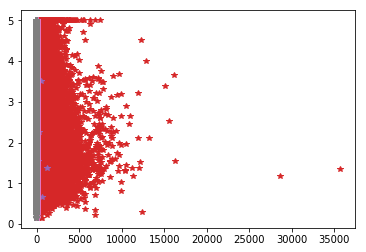

In [184]:
plt.plot(inputData, y_data, '*')

In [185]:
from sklearn.model_selection import train_test_split 
trainX, testX, trainY, testY = train_test_split(inputData, y_data, train_size = 0.7, random_state=60) 
print(trainX.shape) 
print(trainY.shape) 
print(testX.shape) 
print(testY.shape)

(14447, 8)
(14447,)
(6193, 8)
(6193,)


C:\Users\atrya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [186]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(trainX)
trainX_prep = scaler.transform(trainX)
testX_prep = scaler.transform(testX)

In [187]:
trainX_df = pd.DataFrame(data=trainX_prep, columns=trainX.columns, index=trainX.index)
testX_df = pd.DataFrame(data=testX_prep, columns=testX.columns, index=testX.index)

In [188]:
testX_df.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,Latitude,Longitude
16314,0.372549,0.031579,0.028711,0.025591,0.001207,0.150108,0.581296,0.301793
7018,0.745098,0.029519,0.025145,0.030889,0.002180,0.250962,0.151966,0.623506
17123,0.705882,0.028591,0.026089,0.038653,0.002598,0.139964,0.522848,0.221116
4566,0.568627,0.024776,0.029181,0.021219,0.002016,0.139502,0.162593,0.606574
7948,0.843137,0.036469,0.028644,0.014912,0.001179,0.301154,0.140276,0.618526


In [189]:
import tensorflow as tf
feat_cols = [tf.feature_column.numeric_column(feat, shape = [1]) for feat in trainX_df.columns]
feat_cols

[_NumericColumn(key='HouseAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveBedrms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='AveOccup', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='MedInc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [190]:
input_func1 = tf.estimator.inputs.pandas_input_fn(x=trainX_df, y=trainY, batch_size = 10, num_epochs = 1000, shuffle=True)

In [191]:
model = tf.estimator.DNNRegressor(hidden_units=[5,10,12,10,8], feature_columns = feat_cols)

In [192]:
model.train(input_fn = input_func1, steps = 30000)

In [193]:
pred_input_func1 = tf.estimator.inputs.pandas_input_fn(x=testX_df, batch_size=10,num_epochs=1,shuffle=False)
pred_gen = model.predict(input_fn=pred_input_func1)
predictions=list(pred_gen)
y_predict=[i['predictions'] for i in predictions]

In [194]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY,y_predict)**0.5
mse

0.6605471891165954

In [195]:
import math
rmse = math.sqrt(mse)
rmse

0.8127405423113796

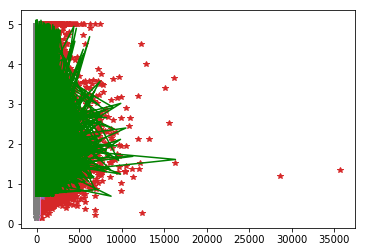

In [196]:
import matplotlib.pyplot as plt
plt.plot(inputData, y_data, '*')
plt.plot(testX, y_predict, 'g')